<a href="https://colab.research.google.com/github/hetpatel007/Het_Special_Topics/blob/main/Copy_of_Independent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


What are the key socio-economic, healthcare, environmental, and psychological factors influencing life expectancy and happiness across South American countries, and how do these factors differ between high and low-performing countries in the region?

In [2]:
# Replace 'your_file.dta' with the path to your Stata file
file_path =  'https://drive.google.com/uc?export=download&id=1Qnx5xrpgey8G6XW3_s2trMMStMmWCVek'

data_1 = pd.read_csv(file_path)

In [3]:
data_1.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
# Select the relevant columns and rename 'Life Ladder' to 'Happiness'
Happiness = data_1[['Country name', 'year', 'Life Ladder', 'Perceptions of corruption','Social support','Log GDP per capita','Generosity','Freedom to make life choices']].copy()

# Rename columns
Happiness.rename(columns={'Life Ladder': 'Happiness', 'Perceptions of corruption': 'Perception of Corruption','Country name':'Country'}, inplace=True)

# Display the first 5 rows of the modified dataset
print(Happiness.head())

       Country  year  Happiness  Perception of Corruption  Social support  \
0  Afghanistan  2008      3.724                     0.882           0.451   
1  Afghanistan  2009      4.402                     0.850           0.552   
2  Afghanistan  2010      4.758                     0.707           0.539   
3  Afghanistan  2011      3.832                     0.731           0.521   
4  Afghanistan  2012      3.783                     0.776           0.521   

   Log GDP per capita  Generosity  Freedom to make life choices  
0               7.370       0.168                         0.718  
1               7.540       0.190                         0.679  
2               7.647       0.121                         0.600  
3               7.620       0.162                         0.496  
4               7.705       0.236                         0.531  


#Filter data for south american countries

In [5]:
# List of South American countries
south_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

# Filter the dataset to include only South American countries
Happiness_South_America = Happiness[Happiness['Country'].isin(south_american_countries)]

# Display the first few rows of the filtered dataset
print(Happiness_South_America.head())


      Country  year  Happiness  Perception of Corruption  Social support  \
37  Argentina  2006      6.313                     0.852           0.938   
38  Argentina  2007      6.073                     0.881           0.862   
39  Argentina  2008      5.961                     0.865           0.892   
40  Argentina  2009      6.424                     0.885           0.919   
41  Argentina  2010      6.441                     0.855           0.927   

    Log GDP per capita  Generosity  Freedom to make life choices  
37               9.942      -0.157                         0.733  
38              10.018      -0.141                         0.653  
39              10.048      -0.132                         0.678  
40               9.977      -0.130                         0.637  
41              10.066      -0.126                         0.730  


Descriptive stats

In [6]:
# Generate descriptive statistics for the filtered dataset
descriptive_stats = Happiness_South_America.describe()

# Print the descriptive statistics
print(descriptive_stats)

              year   Happiness  Perception of Corruption  Social support  \
count   149.000000  149.000000                149.000000      149.000000   
mean   2012.805369    6.055221                  0.785369        0.868591   
std       4.311640    0.555693                  0.095972        0.048694   
min    2005.000000    4.041000                  0.471000        0.756000   
25%    2009.000000    5.713000                  0.741000        0.829000   
50%    2013.000000    6.062000                  0.812000        0.883000   
75%    2016.000000    6.449000                  0.855000        0.906000   
max    2020.000000    7.478000                  0.931000        0.959000   

       Log GDP per capita  Generosity  Freedom to make life choices  
count          146.000000  143.000000                    149.000000  
mean             9.520541   -0.066315                      0.775054  
std              0.373433    0.096861                      0.085986  
min              8.686000   -0.2260

Happiness over the years

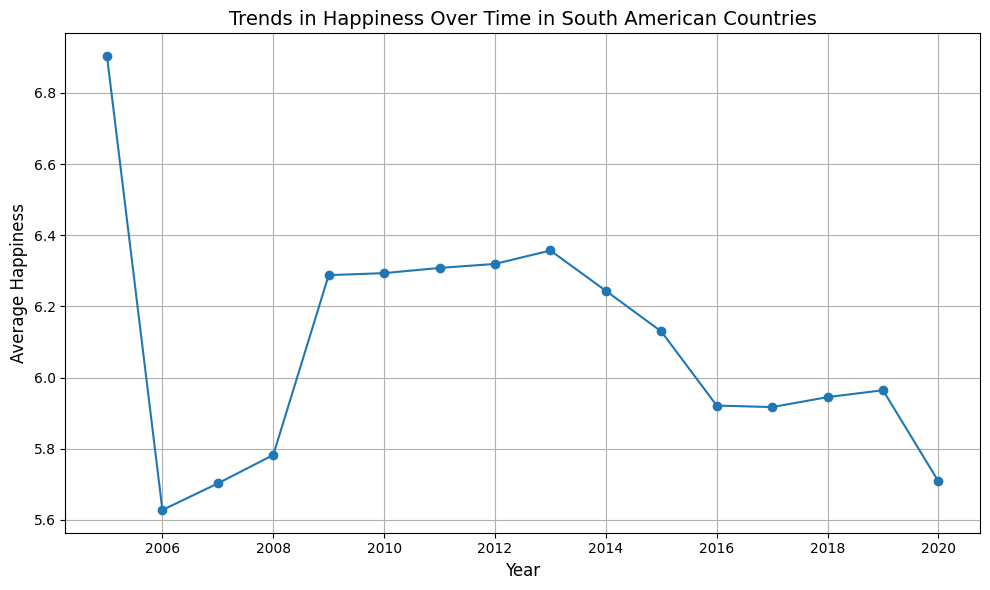

In [7]:
import matplotlib.pyplot as plt

# Grouping the data by year and calculating the mean happiness score for each year
happiness_trends = Happiness_South_America.groupby('year')['Happiness'].mean()

# Plotting the trends in happiness over time
plt.figure(figsize=(10, 6))
plt.plot(happiness_trends.index, happiness_trends.values, marker='o')

# Adding titles and labels
plt.title('Trends in Happiness Over Time in South American Countries', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Happiness', fontsize=12)

# Display grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Filter the data for the year 2006
data_2006 = Happiness_South_America[Happiness_South_America['year'] == 2006]

# Display the data for 2006
print(data_2006)

# Calculate the mean happiness score for 2006
mean_happiness_2006 = data_2006['Happiness'].mean()
print(f"Mean Happiness in 2006: {mean_happiness_2006}")



        Country  year  Happiness  Perception of Corruption  Social support  \
37    Argentina  2006      6.313                     0.852           0.938   
178     Bolivia  2006      5.374                     0.794           0.834   
327       Chile  2006      6.063                     0.634           0.836   
357    Colombia  2006      6.025                     0.808           0.910   
483     Ecuador  2006      5.024                     0.901           0.910   
1353   Paraguay  2006      4.730                     0.841           0.895   
1366       Peru  2006      4.811                     0.895           0.875   
1851    Uruguay  2006      5.786                     0.477           0.912   
1880  Venezuela  2006      6.525                     0.646           0.946   

      Log GDP per capita  Generosity  Freedom to make life choices  
37                 9.942      -0.157                         0.733  
178                8.686      -0.044                         0.770  
327         

In [9]:
# Filter the dataset for the year 2006
data_2006 = Happiness_South_America[Happiness_South_America['year'] == 2006]

# Find the country with the lowest happiness score in 2006
lowest_happiness_2006 = data_2006.loc[data_2006['Happiness'].idxmin()]

# Display the country with the lowest happiness score
print(f"Country with the lowest happiness score in 2006: {lowest_happiness_2006['Country']}")
print(f"Happiness score: {lowest_happiness_2006['Happiness']}")


Country with the lowest happiness score in 2006: Paraguay
Happiness score: 4.73


In [10]:
import plotly.express as px

# Grouping the data by country and calculating the mean happiness for each country
happiness_by_country = Happiness_South_America.groupby('Country')['Happiness'].mean().sort_values()

# Creating an interactive bar chart
fig = px.bar(happiness_by_country,
             x=happiness_by_country.index,
             y='Happiness',
             title='Average Happiness by Country in South America',
             labels={'Happiness': 'Average Happiness', 'index': 'Country'},
             text_auto=True)

# Updating layout for better readability
fig.update_layout(xaxis_title="Country", yaxis_title="Average Happiness",
                  xaxis_tickangle=-45, height=600, width=1000)

# Show the interactive plot
fig.show()


Cooruption over the years

Descriptive Statistics for Perception of Corruption:
count    149.000000
mean       0.785369
std        0.095972
min        0.471000
25%        0.741000
50%        0.812000
75%        0.855000
max        0.931000
Name: Perception of Corruption, dtype: float64


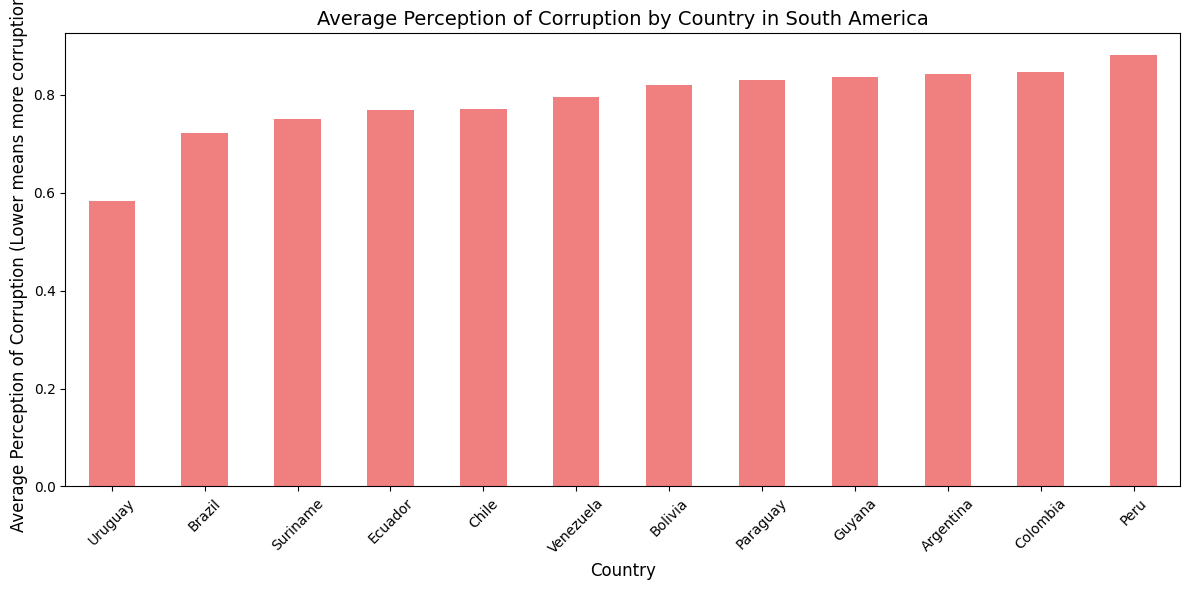

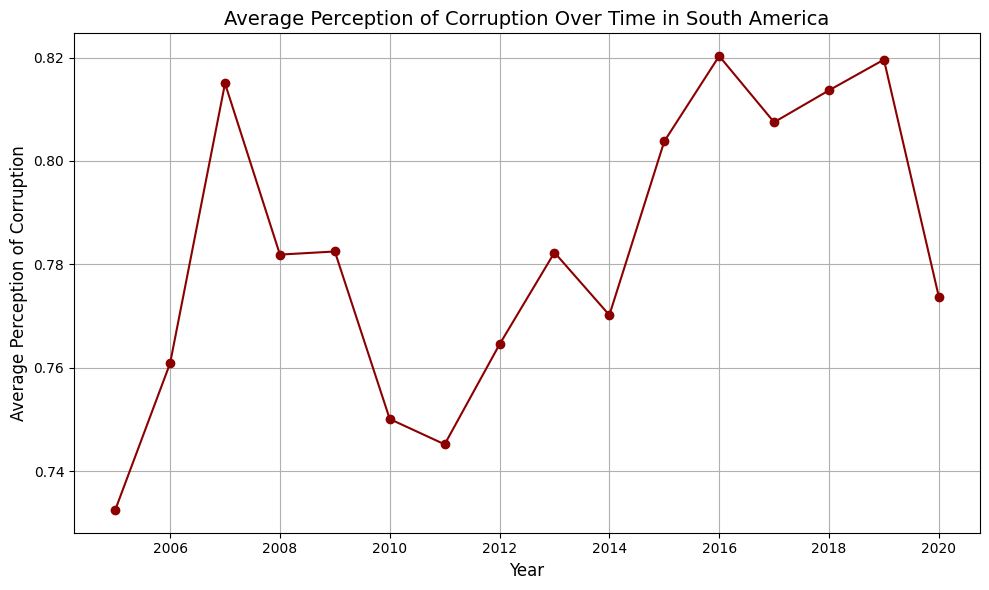

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Summary Statistics for Corruption
corruption_stats = Happiness_South_America['Perception of Corruption'].describe()
print("Descriptive Statistics for Perception of Corruption:")
print(corruption_stats)

# Step 2: Visualization of Corruption by Country
plt.figure(figsize=(12, 6))
corruption_by_country = Happiness_South_America.groupby('Country')['Perception of Corruption'].mean().sort_values()
corruption_by_country.plot(kind='bar', color='lightcoral')

# Adding titles and labels
plt.title('Average Perception of Corruption by Country in South America', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Perception of Corruption (Lower means more corruption)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 3: Corruption Over Time
plt.figure(figsize=(10, 6))
corruption_over_time = Happiness_South_America.groupby('year')['Perception of Corruption'].mean()

# Plotting corruption over time
plt.plot(corruption_over_time.index, corruption_over_time.values, marker='o', color='darkred')
plt.title('Average Perception of Corruption Over Time in South America', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Perception of Corruption', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


#Social support relation with happinness


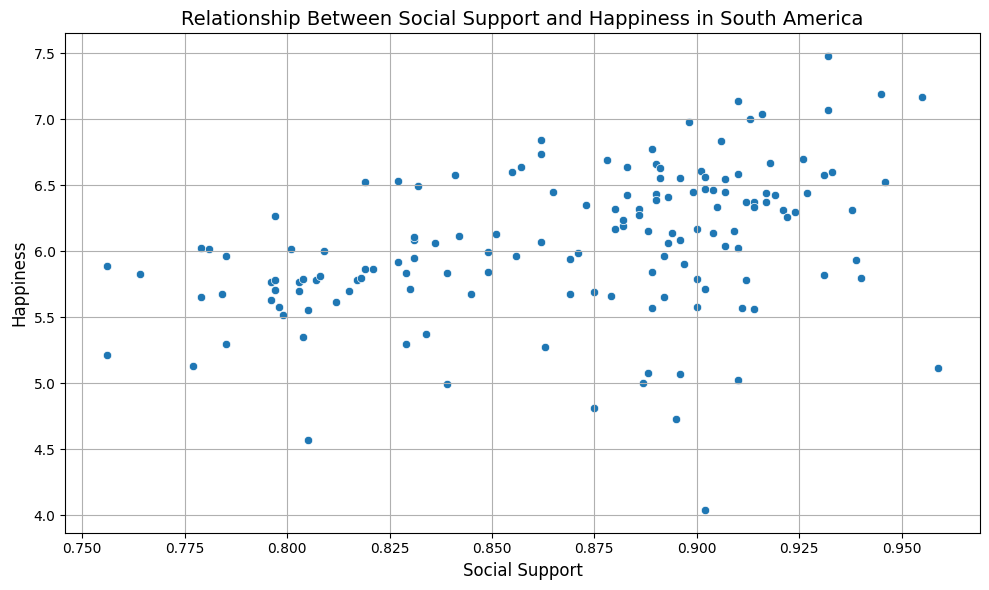

Correlation between Social Support and Happiness: 0.39881870311622225


In [12]:
# Assuming the dataset contains a 'Social support' column
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Scatter Plot to visualize the relationship between Social Support and Happiness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social support', y='Happiness', data=Happiness_South_America)

# Adding titles and labels
plt.title('Relationship Between Social Support and Happiness in South America', fontsize=14)
plt.xlabel('Social Support', fontsize=12)
plt.ylabel('Happiness', fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Correlation Calculation
# Calculating the correlation between Social Support and Happiness
correlation_social_support = Happiness_South_America['Social support'].corr(Happiness_South_America['Happiness'])
print(f"Correlation between Social Support and Happiness: {correlation_social_support}")


#Country wise correlation between social support and Happiness

In [13]:
valid_data = Happiness_South_America.groupby('Country').filter(lambda x: len(x) > 1 and x['Social support'].std() > 0 and x['Happiness'].std() > 0)

# Calculating the correlation between Social Support and Happiness for each country
correlation_by_country = valid_data.groupby('Country').apply(
    lambda x: x['Social support'].corr(x['Happiness'])
)

# Displaying the correlation values by country
print(correlation_by_country)




Country
Argentina    0.353619
Bolivia      0.236771
Brazil       0.588097
Chile        0.300395
Colombia     0.678404
Ecuador     -0.382555
Paraguay     0.120343
Peru        -0.251293
Uruguay      0.330055
Venezuela    0.730268
dtype: float64


<ipython-input-13-893ed009dfe3>:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



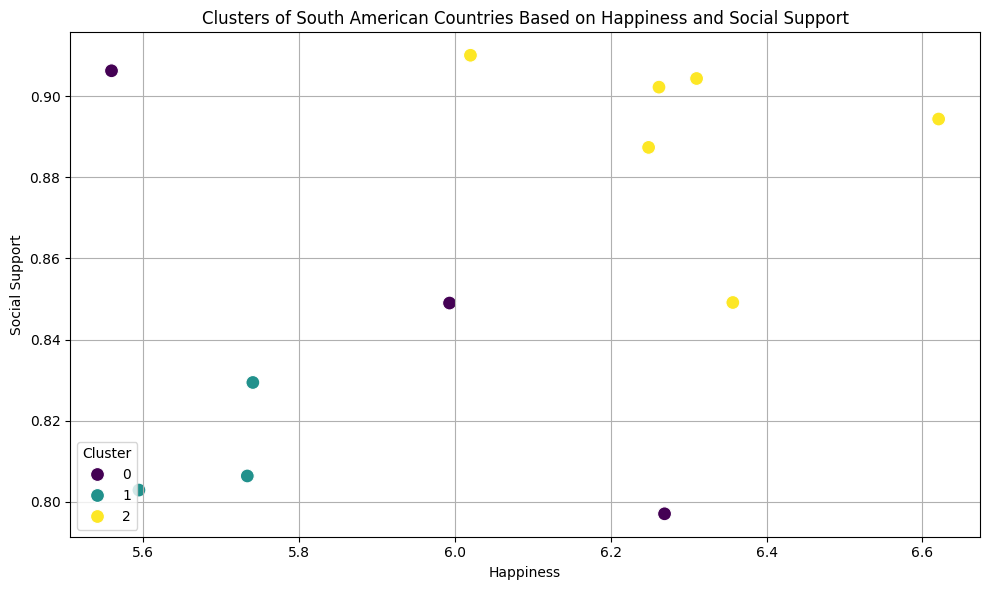


Cluster 2:
['Argentina', 'Brazil', 'Chile', 'Colombia', 'Uruguay', 'Venezuela']

Cluster 1:
['Bolivia', 'Ecuador', 'Peru']

Cluster 0:
['Guyana', 'Paraguay', 'Suriname']


In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for clustering (average happiness and social support per country)
clustering_data = Happiness_South_America.groupby('Country')[['Happiness', 'Social support']].mean()

# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Perform K-Means clustering (try 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Step 2: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Happiness', y='Social support', hue='Cluster', data=clustering_data, palette='viridis', s=100)
plt.title('Clusters of South American Countries Based on Happiness and Social Support')
plt.xlabel('Happiness')
plt.ylabel('Social Support')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Inferences - Print out the countries in each cluster
for cluster in clustering_data['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    print(clustering_data[clustering_data['Cluster'] == cluster].index.tolist())


MLR model for happiness

In [15]:
# Check for missing values in the South American dataset
print(Happiness_South_America.isnull().sum())

Country                         0
year                            0
Happiness                       0
Perception of Corruption        0
Social support                  0
Log GDP per capita              3
Generosity                      6
Freedom to make life choices    0
dtype: int64


In [16]:
# Impute missing values in 'Log GDP per capita' and 'Generosity' with the mean
Happiness_South_America_cleaned = Happiness_South_America.copy()

# Impute missing values
Happiness_South_America_cleaned['Log GDP per capita'].fillna(Happiness_South_America['Log GDP per capita'].mean(), inplace=True)
Happiness_South_America_cleaned['Generosity'].fillna(Happiness_South_America['Generosity'].mean(), inplace=True)

# Check if any null values remain
print(Happiness_South_America_cleaned.isnull().sum())


Country                         0
year                            0
Happiness                       0
Perception of Corruption        0
Social support                  0
Log GDP per capita              0
Generosity                      0
Freedom to make life choices    0
dtype: int64


<ipython-input-16-09ec92385a95>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-16-09ec92385a95>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [17]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd

# Select predictors and target variable
X = Happiness_South_America_cleaned[['Log GDP per capita', 'Perception of Corruption', 'Social support', 'Generosity', 'Freedom to make life choices']]
y = Happiness_South_America_cleaned['Happiness']

# Normalize the predictors using StandardScaler
scaler = StandardScaler()

# Scale the predictors but retain the original index
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# Add a constant (intercept) to the predictors
X_scaled = sm.add_constant(X_scaled)

# Fit the MLR model using statsmodels
mlr_model = sm.OLS(y, X_scaled).fit()

# Print the model summary
print(mlr_model.summary())


                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     24.25
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.27e-17
Time:                        15:23:30   Log-Likelihood:                -77.627
No. Observations:                 149   AIC:                             167.3
Df Residuals:                     143   BIC:                             185.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

###This means that 45.9% of the variability in Happiness is explained by the independent variables (Log GDP per capita, Perception of Corruption, Social support, Generosity, and Freedom to make life choices).
###F-statistic: 24.25
This tests whether the model as a whole is statistically significant.
The high value suggests that the model is significant overall.
Prob (F-statistic): 1.27e-17
This is a very low p-value (close to 0), indicating that the model as a whole is statistically significant. In other words, at least one of the predictors is contributing to explaining happiness.


Argentina, Brazil, Chile, Colombia, Uruguay, Venezuela (High Happiness and High Social Support:)

Countries: Bolivia, Ecuador, Peru (Lower Happiness and Moderate Social Support)

Low Happiness and Low Social Support:
(remaining countries)


In [18]:
pip install gdown

DATASET 2. This is dataset excluding years

In [19]:
#mental health data 2020

file_path =  'https://drive.google.com/uc?export=download&id=1-Uz3Vejfqyd0KBsaHtjLDwHZ40p3Gsq5'

mental_data = pd.read_csv(file_path)

In [20]:
mental_data.columns

Index(['Entity', 'Code', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
      dtype='object')

In [21]:
# Rename columns for simplicity
mental_data = mental_data.rename(columns={
    'Entity': 'Country',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depression',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar Disorder',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating Disorder'
})


In [22]:
mental_data.head()

,Country,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depression,Anxiety,Bipolar Disorder,Eating Disorder
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [23]:
# Remove the 'Schizophrenia disorders' column
mental_data = mental_data.drop(columns=['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'])

In [24]:
# Filter the data to only include rows where the 'Year' is 2010
mental_health_2010 = mental_data.loc[mental_data['Year'] == 2010]

# Display the filtered data to verify the changes
print(mental_health_2010.head())


                Country Code  Year  Depression   Anxiety  Bipolar Disorder  \
20          Afghanistan  AFG  2010    4.946899  4.701994          0.699438   
50    Africa (IHME GBD)  NaN  2010    4.505467  3.687717          0.604825   
80              Albania  ALB  2010    2.442718  3.757140          0.542374   
110             Algeria  DZA  2010    4.049684  4.662890          0.756370   
140  America (IHME GBD)  NaN  2010    3.675616  5.731754          0.839862   

     Eating Disorder  
20          0.104965  
50          0.114916  
80          0.122978  
110         0.200542  
140         0.305284  


In [25]:
# Replace 'your_file.dta' with the path to your Stata file
file_path =  'https://drive.google.com/uc?export=download&id=1uVrERmPTLh0rT6bNXMR6-VLPuK8FspYb'

data_2 = pd.read_csv(file_path)

In [26]:
data_2.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [27]:
# Select the relevant columns and rename 'Life Ladder' to 'Happiness'
Happiness_2 = data_2[['Country name','Ladder score', 'Perceptions of corruption','Explained by: Social support']].copy()

# Rename columns
Happiness_2.rename(columns={'Ladder score': 'Happiness_2', 'Perceptions of corruption': 'Perception of Corruption','Country name':'Country'}, inplace=True)

# Display the first 5 rows of the modified dataset
print(Happiness_2.head())

       Country  Happiness_2  Perception of Corruption  \
0      Finland        7.842                     0.186   
1      Denmark        7.620                     0.179   
2  Switzerland        7.571                     0.292   
3      Iceland        7.554                     0.673   
4  Netherlands        7.464                     0.338   

   Explained by: Social support  
0                         1.106  
1                         1.108  
2                         1.079  
3                         1.172  
4                         1.079  


In [28]:
latin_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Paraguay', 'Peru', 'Uruguay', 'Venezuela', 'Nicaragua', 'Panama',
    'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico',
    'Jamaica', 'Dominican Republic', 'Haiti', 'Bahamas', 'Trinidad and Tobago',
    'Barbados', 'Cuba', 'Suriname', 'Puerto Rico', 'Guyana', 'Belize',
    'Spain', 'Portugal', 'Italy', 'Philippines', 'Turkey', 'South Africa',
    'Morocco', 'Lebanon', 'Armenia', 'Greece'
]

# Filter the dataset to include only the selected countries
Happiness_Latin_America = Happiness_2[Happiness_2['Country'].isin(latin_american_countries)]

# Display the first few rows of the filtered dataset
print(Happiness_Latin_America.head())



       Country  Happiness_2  Perception of Corruption  \
15  Costa Rica        7.069                     0.809   
26       Spain        6.491                     0.745   
27       Italy        6.483                     0.866   
29   Guatemala        6.435                     0.775   
30     Uruguay        6.431                     0.590   

    Explained by: Social support  
15                         0.966  
26                         1.057  
27                         0.940  
29                         0.790  
30                         1.042  


In [29]:
Happiness_Latin_America.shape

(30, 4)

In [30]:
import gdown

# List of file IDs and corresponding output filenames
files_to_download = [
    ('1zC8IWEJvh27pKiUfEa9VqgMdcEgzbp3M', 'Fertility.csv'),
    ('1OV-4iR324EoSMjjZWzTa-VM3DBoZwgtB', 'GDP_per_capita.csv'),
    ('1VkGtAwtBnf8HKPOTSlswnVsGlqHoia-d', 'Life_expectancy.csv'),
    ('1n9c9A579bRb2ikHtqtmKr2_8cN8KBEUV', 'Meat_Consumption.csv'),
    ('1SMS7uiS4pmJG9nay9LcJAMP9g5cGFHF3', 'Median_age.csv'),
    ('1vDheKnRbFwFbPp8mtrsOl9ZGVj-LKzqq', 'Population_growth.csv'),
    ('1QY8l_WiGEugI4aE-_X1Vy5SVabX5vXuT', 'Sex_Ratio.csv'),
    ('1HO6khjc4eOxQ-DHKZOCR07xZZiz2s4M4', 'Suicide_Rate.csv'),
    ('1WPU-rrrfuxCwLIJzhSmITB14ky_EtCjZ', 'Urbanization_Rate.csv')
]

# Loop to download each file
for file_id, output in files_to_download:
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1zC8IWEJvh27pKiUfEa9VqgMdcEgzbp3M
To: /content/Fertility.csv
100%|██████████| 3.51k/3.51k [00:00<00:00, 9.63MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OV-4iR324EoSMjjZWzTa-VM3DBoZwgtB
To: /content/GDP_per_capita.csv
100%|██████████| 3.69k/3.69k [00:00<00:00, 10.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VkGtAwtBnf8HKPOTSlswnVsGlqHoia-d
To: /content/Life_expectancy.csv
100%|██████████| 3.46k/3.46k [00:00<00:00, 767kB/s]
Downloading...
From: https://drive.google.com/uc?id=1n9c9A579bRb2ikHtqtmKr2_8cN8KBEUV
To: /content/Meat_Consumption.csv
100%|██████████| 3.48k/3.48k [00:00<00:00, 8.53MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SMS7uiS4pmJG9nay9LcJAMP9g5cGFHF3
To: /content/Median_age.csv
100%|██████████| 4.22k/4.22k [00:00<00:00, 8.13MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vDheKnRbFwFbPp8mtrsOl9ZGVj-LKzqq
To: /content/Population_growth.csv
100%|██████████| 3.91k/3.91k [0

In [31]:
import pandas as pd

# List of the CSV file paths
file_paths = [
    'Fertility.csv',
    'GDP_per_capita.csv',
    'Life_expectancy.csv',
    'Meat_Consumption.csv',
    'Median_age.csv',
    'Population_growth.csv',
    'Sex_Ratio.csv',
    'Suicide_Rate.csv',
    'Urbanization_Rate.csv'
]

# Initialize a list to hold the DataFrames
dataframes = []

# Load each CSV file into a DataFrame and append it to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Start with the first DataFrame and merge it with the rest based on 'Country' and 'ISO-code'
merged_df = dataframes[0]
for df in dataframes[1:]:
    # Merge on both 'Country' and 'ISO-code' columns, handling duplicate columns using suffixes
    merged_df = pd.merge(merged_df, df, on=['Country', 'ISO-code'], how='outer', suffixes=('', '_other'))

# Display the merged DataFrame
print(merged_df.head())

# Optionally save the merged DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)



          Country  Fertility ISO-code  GDP per capita  Life expectancy  \
0     Afghanistan        4.5      AFG          2182.0             64.5   
1         Albania        1.6      ALB         14866.0              NaN   
2         Algeria        3.0      DZA         16091.0             76.7   
3  American Samoa        NaN      ASM             NaN              NaN   
4         Andorra        1.3      AND             NaN             81.8   

   Meat consumption  Median age  Population growth  Sex-ratio  Suicide rate  \
0              17.3        27.4               2.41       1.03           6.4   
1               NaN        32.9               0.26       0.98           5.6   
2              18.3        28.1               1.89       1.03           3.3   
3              24.9        25.5              -0.26       1.00           NaN   
4               NaN        44.3               0.63       1.06           NaN   

   Urbanization rate  
0               26.0  
1               62.1  
2          

In [32]:
merged_df.head()

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate
0,Afghanistan,4.5,AFG,2182.0,64.5,17.3,27.4,2.41,1.03,6.4,26.0
1,Albania,1.6,ALB,14866.0,NaN,NaN,32.9,0.26,0.98,5.6,62.1
2,Algeria,3.0,DZA,16091.0,76.7,18.3,28.1,1.89,1.03,3.3,73.7
3,American Samoa,NaN,ASM,NaN,NaN,24.9,25.5,-0.26,1.00,NaN,87.2
4,Andorra,1.3,AND,NaN,81.8,NaN,44.3,0.63,1.06,NaN,87.9


In [33]:

# Filter the merged DataFrame for Latin america countries only
latin_america_df = merged_df[merged_df['Country'].isin(latin_american_countries)]


In [34]:
latin_america_df.head(

)

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate
8,Argentina,2.3,ARG,19971.0,76.5,79.7,31.7,0.88,0.98,9.1,92.1
9,Armenia,1.8,ARM,11845.0,74.9,27.7,35.1,0.17,0.95,5.7,63.3
16,Barbados,1.6,BRB,19364.0,79.1,88.7,38.6,0.50,0.94,0.4,31.2
19,Belize,2.3,BLZ,8791.0,74.5,74.7,22.7,2.43,1.00,5.9,46.0
23,Bolivia,2.7,BOL,8525.0,71.2,50.0,24.3,1.65,0.98,12.9,70.1


In [35]:
mental_health_2010.head()

,Country,Code,Year,Depression,Anxiety,Bipolar Disorder,Eating Disorder
20,Afghanistan,AFG,2010,4.946899,4.701994,0.699438,0.104965
50,Africa (IHME GBD),NaN,2010,4.505467,3.687717,0.604825,0.114916
80,Albania,ALB,2010,2.442718,3.757140,0.542374,0.122978
110,Algeria,DZA,2010,4.049684,4.662890,0.756370,0.200542
140,America (IHME GBD),NaN,2010,3.675616,5.731754,0.839862,0.305284


In [36]:
latin_america_df['Country'].unique()

array(['Argentina', 'Armenia', 'Barbados', 'Belize', 'Bolivia', 'Brazil',
       'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Greece', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Italy', 'Jamaica', 'Lebanon', 'Mexico', 'Morocco',
       'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Philippines',
       'Portugal', 'Puerto Rico', 'South Africa', 'Spain', 'Suriname',
       'Trinidad and Tobago', 'Turkey', 'Uruguay', 'Venezuela'],
      dtype=object)

In [37]:
latin_america_df.shape

(37, 11)

In [38]:
Happiness_Latin_America['Country'].unique()

array(['Costa Rica', 'Spain', 'Italy', 'Guatemala', 'Uruguay', 'Brazil',
       'Mexico', 'Jamaica', 'Panama', 'Chile', 'El Salvador', 'Colombia',
       'Nicaragua', 'Argentina', 'Portugal', 'Honduras', 'Philippines',
       'Peru', 'Ecuador', 'Greece', 'Bolivia', 'Paraguay',
       'Dominican Republic', 'Armenia', 'South Africa', 'Turkey',
       'Morocco', 'Venezuela', 'Lebanon', 'Haiti'], dtype=object)

In [39]:
Happiness_Latin_America.shape

(30, 4)

In [40]:
final_merged_df_2 = pd.merge(latin_america_df, Happiness_Latin_America, on='Country', how='inner')

# Display the merged dataframe to ensure the merge was successful
print(final_merged_df_2.head())


     Country  Fertility ISO-code  GDP per capita  Life expectancy  \
0  Argentina        2.3      ARG         19971.0             76.5   
1    Armenia        1.8      ARM         11845.0             74.9   
2    Bolivia        2.7      BOL          8525.0             71.2   
3     Brazil        1.7      BRA         17106.0             75.7   
4      Chile        1.6      CHL         27150.0             80.0   

   Meat consumption  Median age  Population growth  Sex-ratio  Suicide rate  \
0              79.7        31.7               0.88       0.98           9.1   
1              27.7        35.1               0.17       0.95           5.7   
2              50.0        24.3               1.65       0.98          12.9   
3              82.4        32.6               0.87       0.97           6.1   
4              66.4        34.4               0.90       0.97           9.7   

   Urbanization rate  Happiness_2  Perception of Corruption  \
0               92.1        5.929              

In [41]:
final_merged_df_2.head()

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Happiness_2,Perception of Corruption,Explained by: Social support
0,Argentina,2.3,ARG,19971.0,76.5,79.7,31.7,0.88,0.98,9.1,92.1,5.929,0.834,0.980
1,Armenia,1.8,ARM,11845.0,74.9,27.7,35.1,0.17,0.95,5.7,63.3,5.283,0.629,0.758
2,Bolivia,2.7,BOL,8525.0,71.2,50.0,24.3,1.65,0.98,12.9,70.1,5.716,0.839,0.782
3,Brazil,1.7,BRA,17106.0,75.7,82.4,32.6,0.87,0.97,6.1,87.1,6.330,0.756,0.944
4,Chile,1.6,CHL,27150.0,80.0,66.4,34.4,0.90,0.97,9.7,87.7,6.172,0.830,0.946


In [42]:
# Merge the two dataframes based on the 'Country' column
dx = pd.merge(final_merged_df_2, mental_health_2010, on='Country', how='inner')

# Display the merged dataframe to ensure the merge was successful
print(dx.head())


     Country  Fertility ISO-code  GDP per capita  Life expectancy  \
0  Argentina        2.3      ARG         19971.0             76.5   
1    Armenia        1.8      ARM         11845.0             74.9   
2    Bolivia        2.7      BOL          8525.0             71.2   
3     Brazil        1.7      BRA         17106.0             75.7   
4      Chile        1.6      CHL         27150.0             80.0   

   Meat consumption  Median age  Population growth  Sex-ratio  Suicide rate  \
0              79.7        31.7               0.88       0.98           9.1   
1              27.7        35.1               0.17       0.95           5.7   
2              50.0        24.3               1.65       0.98          12.9   
3              82.4        32.6               0.87       0.97           6.1   
4              66.4        34.4               0.90       0.97           9.7   

   Urbanization rate  Happiness_2  Perception of Corruption  \
0               92.1        5.929              

In [43]:
dx.shape

(30, 20)

Before Regression models wanted to focus on finding relationship between variables
0) Continent wise comparison
1) URBANIZATION RATE AND SUICIDE     (urbanization rate is shift of popn from rural to urban areas)
2) Sex ratio by gdp per capita
3) Meat consumption and happiness

Average life expactancy

In [44]:
import plotly.express as px

# Sort the DataFrame by life expectancy for better visualization
final_merged_df_2_sorted = dx.sort_values(by='Life expectancy', ascending=False)

# Create an interactive bar plot for life expectancy by country
fig = px.bar(final_merged_df_2_sorted,
             x='Life expectancy',
             y='Country',
             orientation='h',
             title='Life Expectancy by Country in LAtin America',
             labels={'Life expectancy':'Life Expectancy (years)', 'Country':'Country'},
             text='Life expectancy')

# Customize the layout for better readability
fig.update_layout(xaxis_title='Life Expectancy (years)',
                  yaxis_title='Country',
                  title_x=0.5,
                  height=600)

# Show the interactive plot
fig.show()

Trend Analysis

1) Urbanization rate and suicide in south american countries

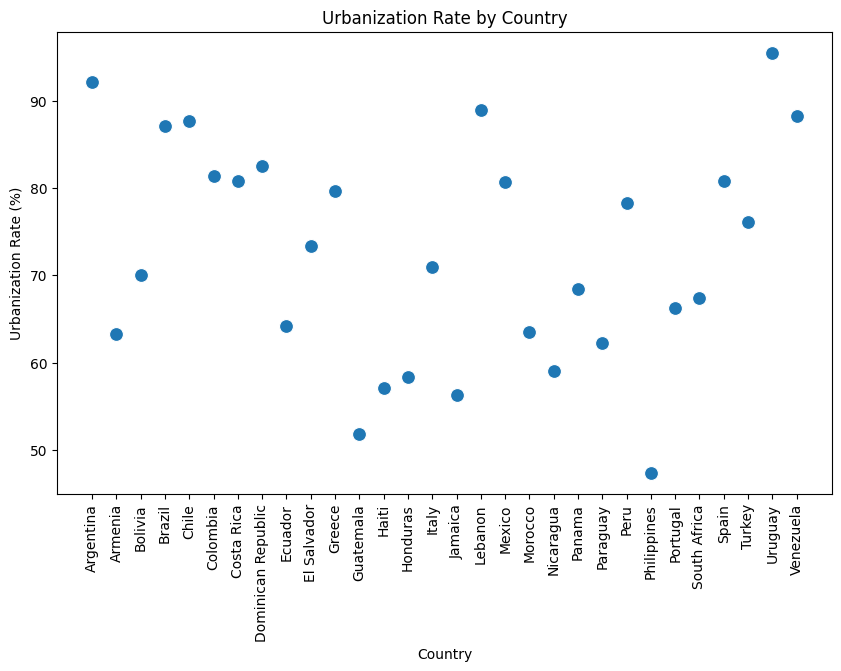

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with Urbanization Rate for each country
plt.figure(figsize=(10, 6))

# Scatter plot for Urbanization Rate by Country
sns.scatterplot(x='Country', y='Urbanization rate', data=final_merged_df_2, s=100)

plt.title('Urbanization Rate by Country')
plt.xlabel('Country')
plt.ylabel('Urbanization Rate (%)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
plt.show()


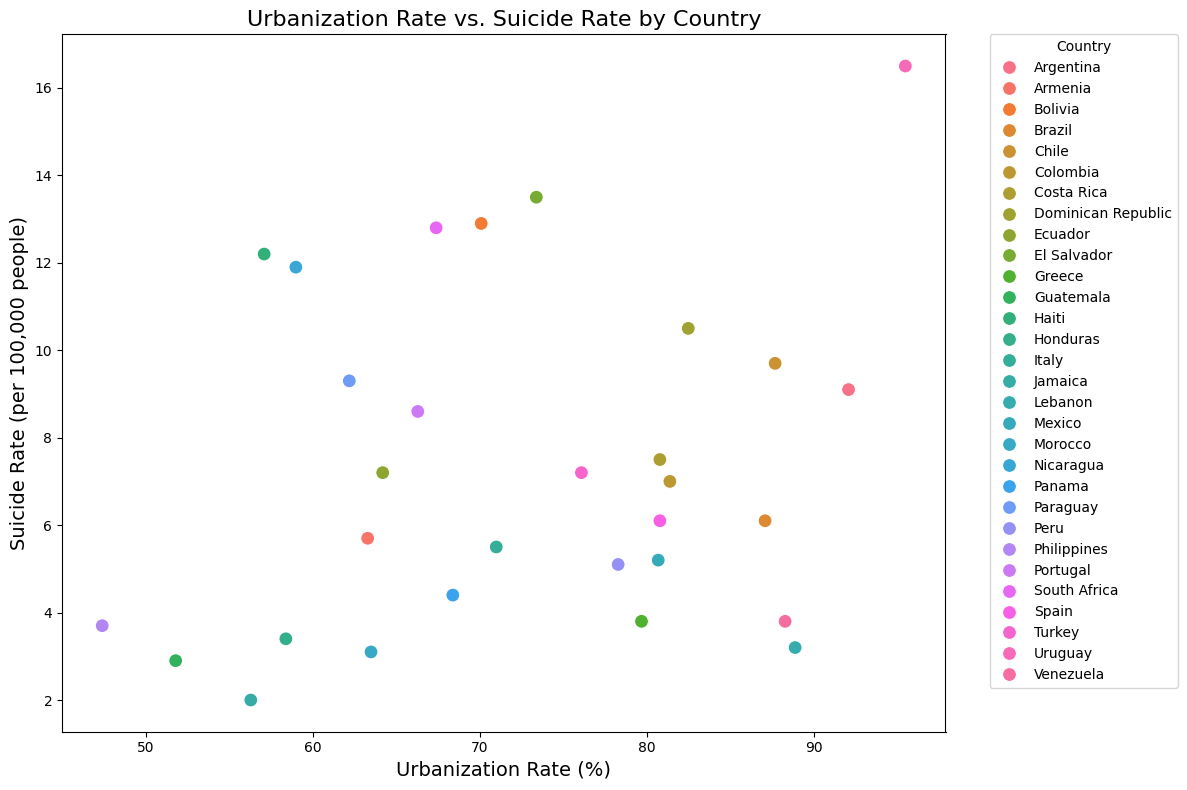

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(12, 8))

# Scatter plot with improved legend placement
sns.scatterplot(x='Urbanization rate', y='Suicide rate', data=dx, hue='Country', s=100, palette="husl")

# Set title and labels
plt.title('Urbanization Rate vs. Suicide Rate by Country', fontsize=16)
plt.xlabel('Urbanization Rate (%)', fontsize=14)
plt.ylabel('Suicide Rate (per 100,000 people)', fontsize=14)

# Adjust the legend to be outside the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


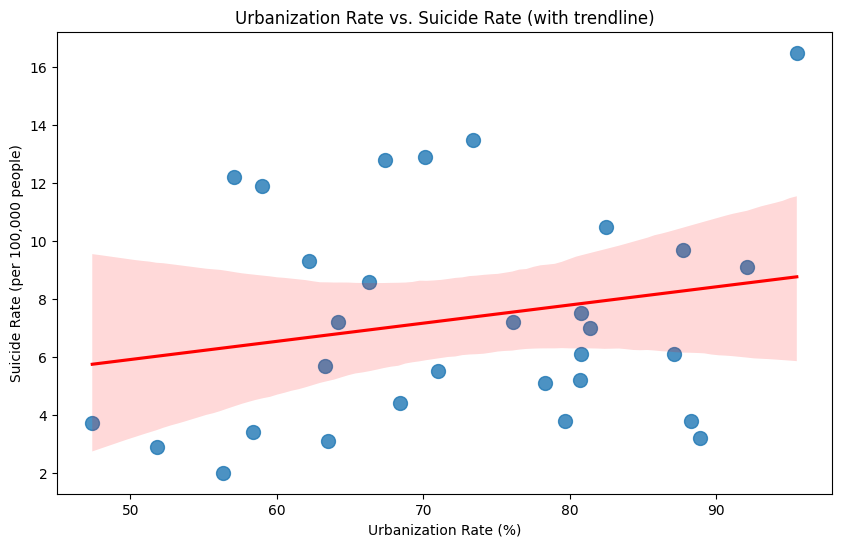

In [47]:
# Scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Urbanization rate', y='Suicide rate', data=dx, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Urbanization Rate vs. Suicide Rate (with trendline)')
plt.xlabel('Urbanization Rate (%)')
plt.ylabel('Suicide Rate (per 100,000 people)')
plt.show()


# All countries

In [48]:
# Pearson correlation coefficient
correlation = merged_df[['Urbanization rate', 'Suicide rate']].corr()
print("Correlation between Urbanization Rate and Suicide Rate:\n", correlation)


Correlation between Urbanization Rate and Suicide Rate:
                    Urbanization rate  Suicide rate
Urbanization rate           1.000000      0.047991
Suicide rate                0.047991      1.000000


In [49]:
# Pearson correlation coefficient
correlation = dx[['Urbanization rate', 'Suicide rate']].corr()
print("Correlation between Urbanization Rate and Suicide Rate:\n", correlation)  # south american countries


Correlation between Urbanization Rate and Suicide Rate:
                    Urbanization rate  Suicide rate
Urbanization rate           1.000000      0.211645
Suicide rate                0.211645      1.000000


# Meat consumption and Happiness

In [50]:
dx.head()

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Happiness_2,Perception of Corruption,Explained by: Social support,Code,Year,Depression,Anxiety,Bipolar Disorder,Eating Disorder
0,Argentina,2.3,ARG,19971.0,76.5,79.7,31.7,0.88,0.98,9.1,92.1,5.929,0.834,0.980,ARG,2010,2.413849,4.889307,1.039087,0.315531
1,Armenia,1.8,ARM,11845.0,74.9,27.7,35.1,0.17,0.95,5.7,63.3,5.283,0.629,0.758,ARM,2010,2.896215,3.150081,0.541941,0.113889
2,Bolivia,2.7,BOL,8525.0,71.2,50.0,24.3,1.65,0.98,12.9,70.1,5.716,0.839,0.782,BOL,2010,3.443046,5.653197,0.887360,0.213614
3,Brazil,1.7,BRA,17106.0,75.7,82.4,32.6,0.87,0.97,6.1,87.1,6.330,0.756,0.944,BRA,2010,3.962524,8.496533,1.112197,0.220067
4,Chile,1.6,CHL,27150.0,80.0,66.4,34.4,0.90,0.97,9.7,87.7,6.172,0.830,0.946,CHL,2010,3.656720,5.582964,0.995287,0.327942


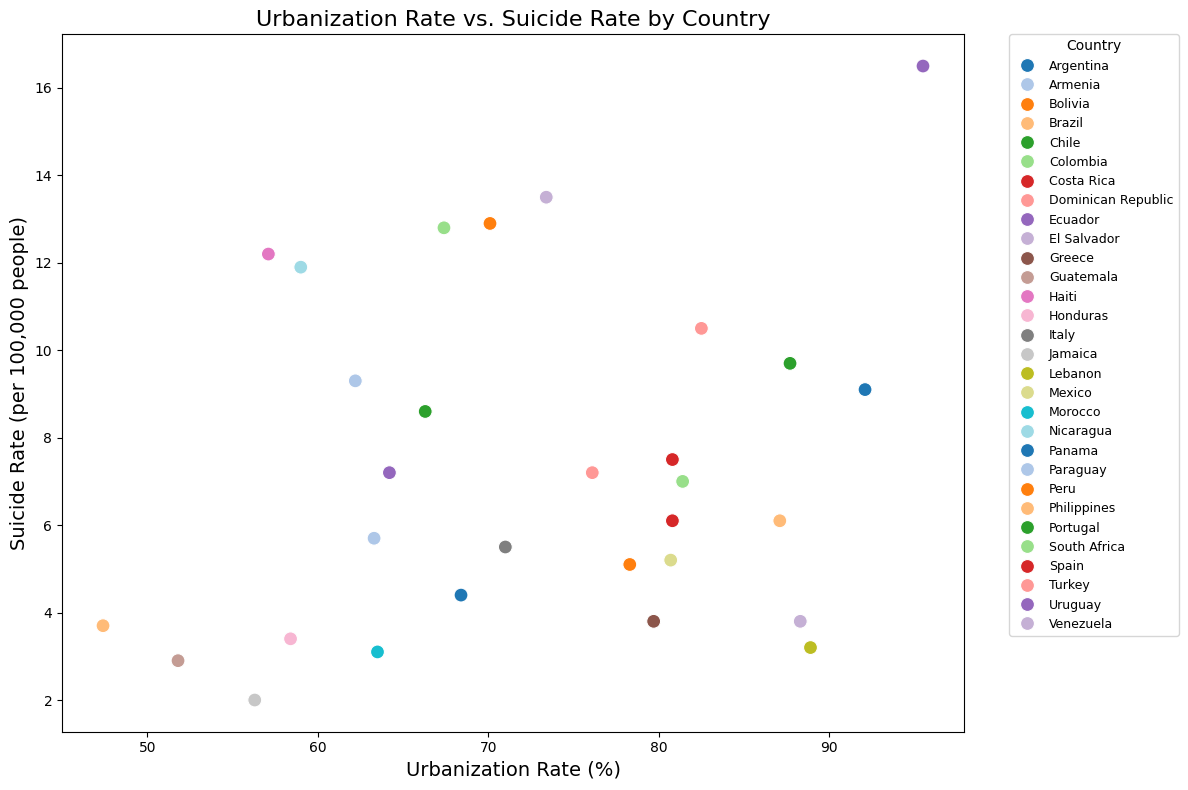

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(12, 8))

# Scatter plot with improved legend placement and distinct colors
sns.scatterplot(x='Urbanization rate', y='Suicide rate', data=dx, hue='Country', s=100, palette="tab20")

# Set title and labels with increased font size for clarity
plt.title('Urbanization Rate vs. Suicide Rate by Country', fontsize=16)
plt.xlabel('Urbanization Rate (%)', fontsize=14)
plt.ylabel('Suicide Rate (per 100,000 people)', fontsize=14)

# Move the legend outside the plot to avoid overlapping with data points
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=9)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



In [52]:
# Calculate the Pearson correlation coefficient
correlation = final_merged_df_2[['Meat consumption', 'Happiness_2']].corr()

# Display the correlation value
print("Correlation between Meat Consumption and Happiness:\n", correlation)


Correlation between Meat Consumption and Happiness:
                   Meat consumption  Happiness_2
Meat consumption          1.000000     0.394949
Happiness_2               0.394949     1.000000


#Happiness and GDP

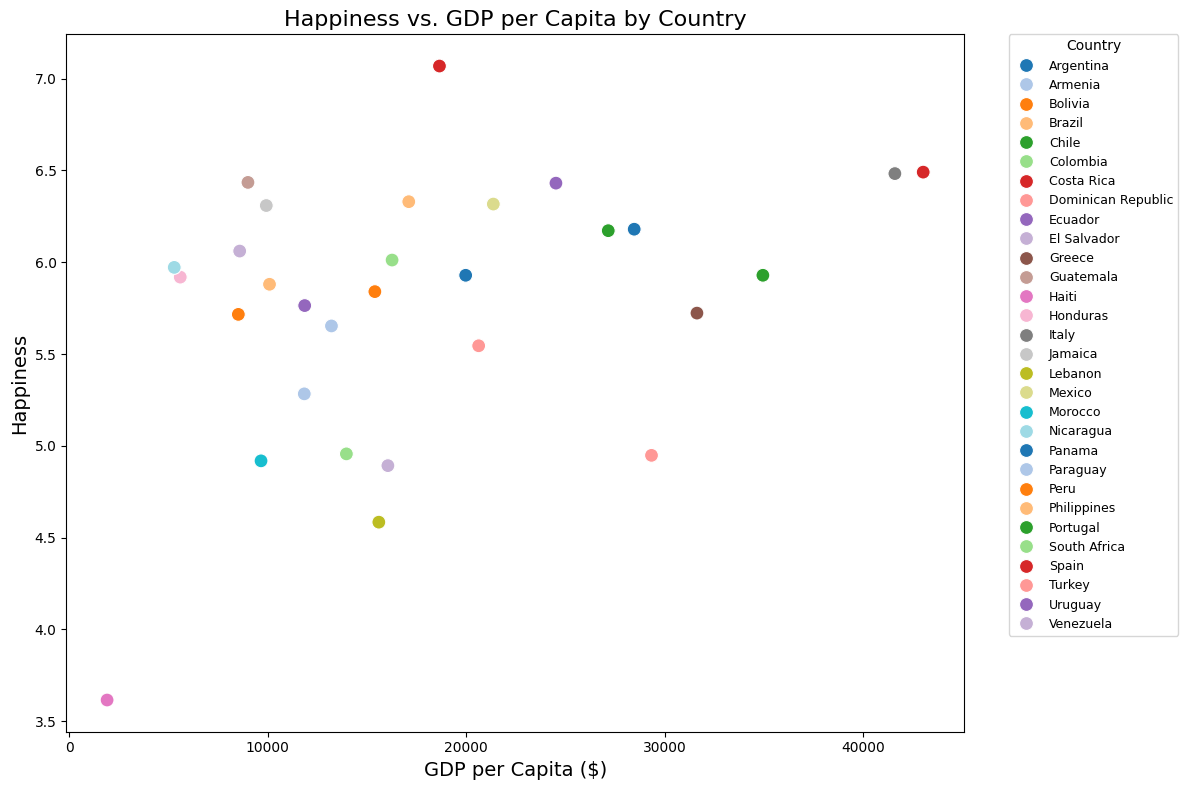

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(12, 8))

# Scatter plot with improved legend placement and distinct colors
sns.scatterplot(x='GDP per capita', y='Happiness_2', data=final_merged_df_2, hue='Country', s=100, palette="tab20")

# Set title and labels with increased font size for clarity
plt.title('Happiness vs. GDP per Capita by Country', fontsize=16)
plt.xlabel('GDP per Capita ($)', fontsize=14)
plt.ylabel('Happiness', fontsize=14)

# Move the legend outside the plot to avoid overlapping with data points
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=9)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [54]:
#Included latin american countries
import statsmodels.api as sm

# Define independent variables (predictors) and dependent variable (Happiness)
X = dx[['GDP per capita', 'Life expectancy', 'Meat consumption', 'Urbanization rate', 'Perception of Corruption', 'Explained by: Social support','Population growth','Depression']]
y = dx['Happiness_2']

# Add constant (intercept)
X = sm.add_constant(X)

# Fit the MLR model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Happiness_2   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     5.047
Date:                Thu, 31 Oct 2024   Prob (F-statistic):            0.00136
Time:                        15:24:18   Log-Likelihood:                -15.358
No. Observations:                  30   AIC:                             48.72
Df Residuals:                      21   BIC:                             61.33
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

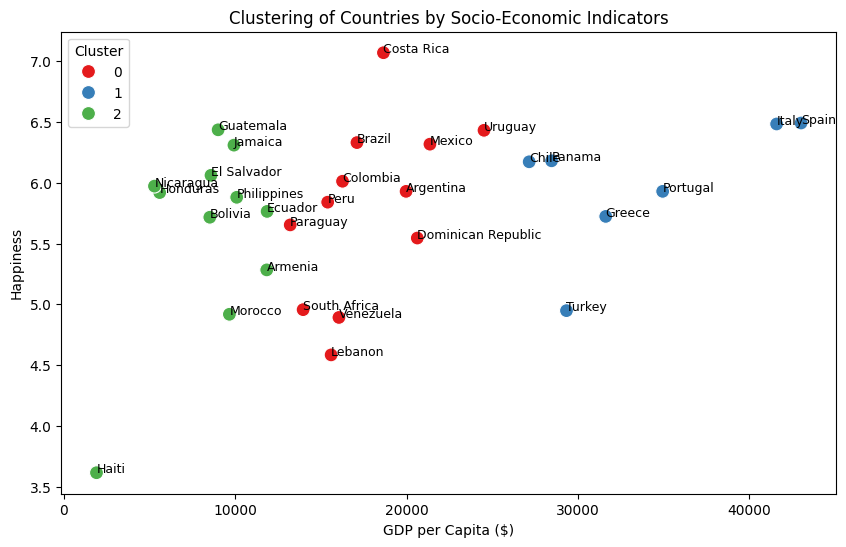

In [55]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for clustering
X = final_merged_df_2[['GDP per capita', 'Life expectancy', 'Meat consumption', 'Urbanization rate', 'Happiness_2','Population growth']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Assign cluster labels to the dataframe
final_merged_df_2['Cluster'] = kmeans.labels_

# Scatter plot with cluster assignments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Happiness_2', hue='Cluster', data=final_merged_df_2, palette='Set1', s=100)
# Add country names as text labels on the plot
for i in range(final_merged_df_2.shape[0]):
    plt.text(final_merged_df_2['GDP per capita'].iloc[i], final_merged_df_2['Happiness_2'].iloc[i],
             final_merged_df_2['Country'].iloc[i], fontsize=9)
# Set plot title and labels
plt.title('Clustering of Countries by Socio-Economic Indicators')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Happiness')
# Show plot
plt.show()


Cluster 0 (Red): Most countries in this cluster, such as Nicaragua, Honduras, and Guatemala, have relatively low GDP per capita and moderate-to-low happiness. This suggests that these countries may face economic challenges that contribute to lower overall happiness.
Cluster 1 (Blue): Countries like Chile and Panama have higher GDP per capita, indicating stronger economies, and their happiness levels are also among the highest. This suggests a positive relationship between wealth and happiness in this group.
Cluster 2 (Green): This cluster represents countries with middle to high GDP per capita but also varying levels of happiness. Brazil, Costa Rica, and Argentina are examples, where Costa Rica has a high happiness score, while Brazil and Argentina have moderate happiness levels.

In [56]:
 #Understanding the Impact of Social Support:

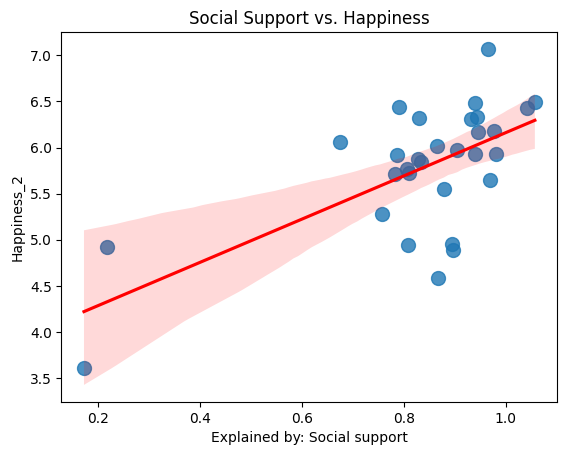

In [57]:
sns.regplot(x='Explained by: Social support', y='Happiness_2', data=dx, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Social Support vs. Happiness')
plt.show()


#Mental Health over years
# In latin american countries

In [58]:
data_1.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [59]:
mental_data.head()

,Country,Code,Year,Depression,Anxiety,Bipolar Disorder,Eating Disorder
0,Afghanistan,AFG,1990,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,4.977782,4.670810,0.699898,0.111815


<ipython-input-60-e6535333b317>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




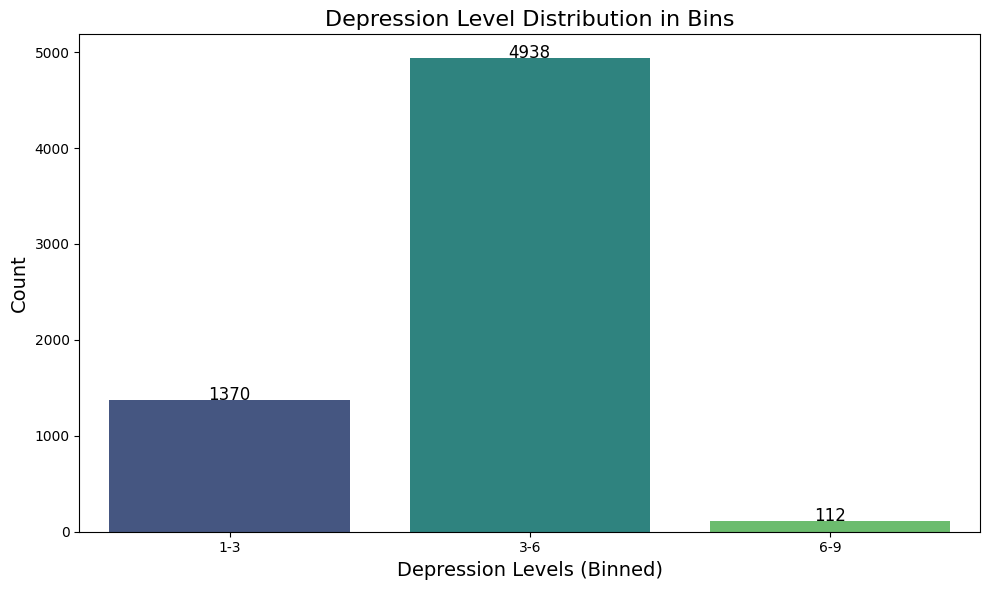

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define bins and labels
bins = [0, 3, 6, 9]
labels = ['1-3', '3-6', '6-9']

# Create a new column in mental_data with binned categories
mental_data['Depression_Binned'] = pd.cut(mental_data['Depression'], bins=bins, labels=labels, right=True)

# Count the occurrences of each bin
depression_binned_counts = mental_data['Depression_Binned'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=depression_binned_counts.index, y=depression_binned_counts.values, palette="viridis")

# Customize the plot
plt.title('Depression Level Distribution in Bins', fontsize=16)
plt.xlabel('Depression Levels (Binned)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show values on top of each bar
for i, v in enumerate(depression_binned_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [61]:
# Rename columns
data_1.rename(columns={'Country name': 'Country', 'year': 'Year'}, inplace=True)

# Display the first few rows to confirm changes
print(data_1.head())


       Country  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0        

In [62]:
# Ensure that both datasets have matching column names for merging
mental_data.rename(columns={'year': 'Year', 'Country name': 'Country'}, inplace=True)

# Merge the two datasets on 'Country' and 'Year'
dt_1 = pd.merge(data_1, mental_data, on=['Country', 'Year'], how='inner')

# Display the first few rows of the merged dataset to verify the result
print(dt_1.head())


       Country  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect Code  \
0  

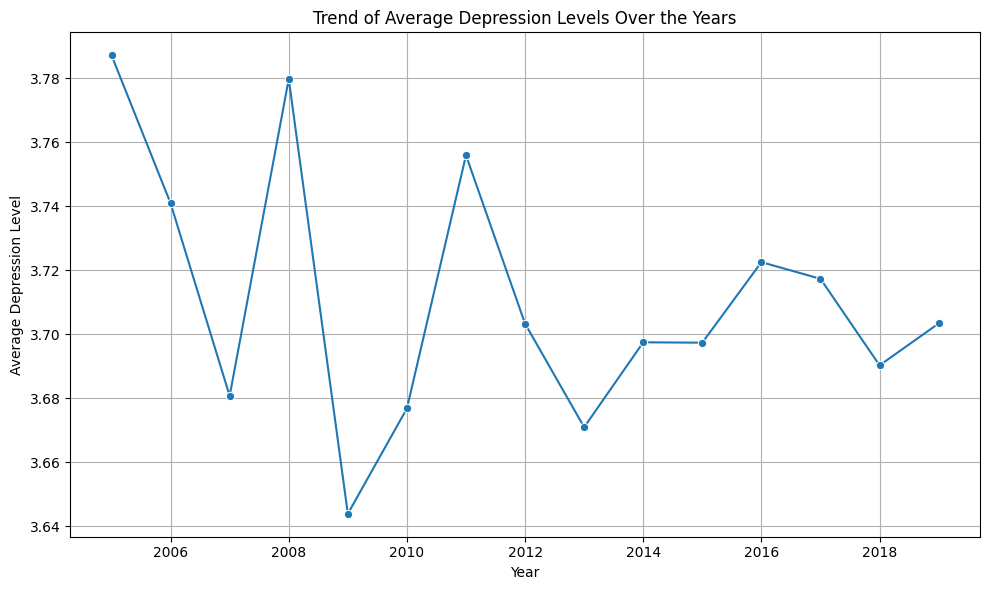

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average depression level per year
depression_trend = dt_1.groupby('Year')['Depression'].mean().reset_index()

# Plot the trend over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Depression', data=depression_trend, marker='o')

# Customize the plot
plt.title('Trend of Average Depression Levels Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Depression Level')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [64]:
# Filter the dataset to include only the selected countries
filtered_data = dt_1[dt_1['Country'].isin(latin_american_countries)]

# Calculate the average depression level per country
average_depression_by_country = filtered_data.groupby('Country')['Depression'].mean().reset_index()

# Sort the values for better readability (optional)
average_depression_by_country = average_depression_by_country.sort_values(by='Depression', ascending=False)

# Display the result
print(average_depression_by_country)


                Country  Depression
12               Greece    5.161137
21              Morocco    5.098038
14               Guyana    5.066729
19              Lebanon    4.975977
30             Suriname    4.724519
27             Portugal    4.545675
29                Spain    4.402438
28         South Africa    4.175856
32               Turkey    4.076403
4                Brazil    3.976079
8                  Cuba    3.971099
13            Guatemala    3.861209
9    Dominican Republic    3.855223
31  Trinidad and Tobago    3.777832
5                 Chile    3.724690
24             Paraguay    3.631041
15                Haiti    3.616303
17                Italy    3.520298
20               Mexico    3.471118
3               Bolivia    3.441450
11          El Salvador    3.439989
10              Ecuador    3.342287
22            Nicaragua    3.292790
2                Belize    3.285906
34            Venezuela    3.198478
7            Costa Rica    3.194278
16             Honduras    3

<ipython-input-65-ba8f7d2d9d9a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




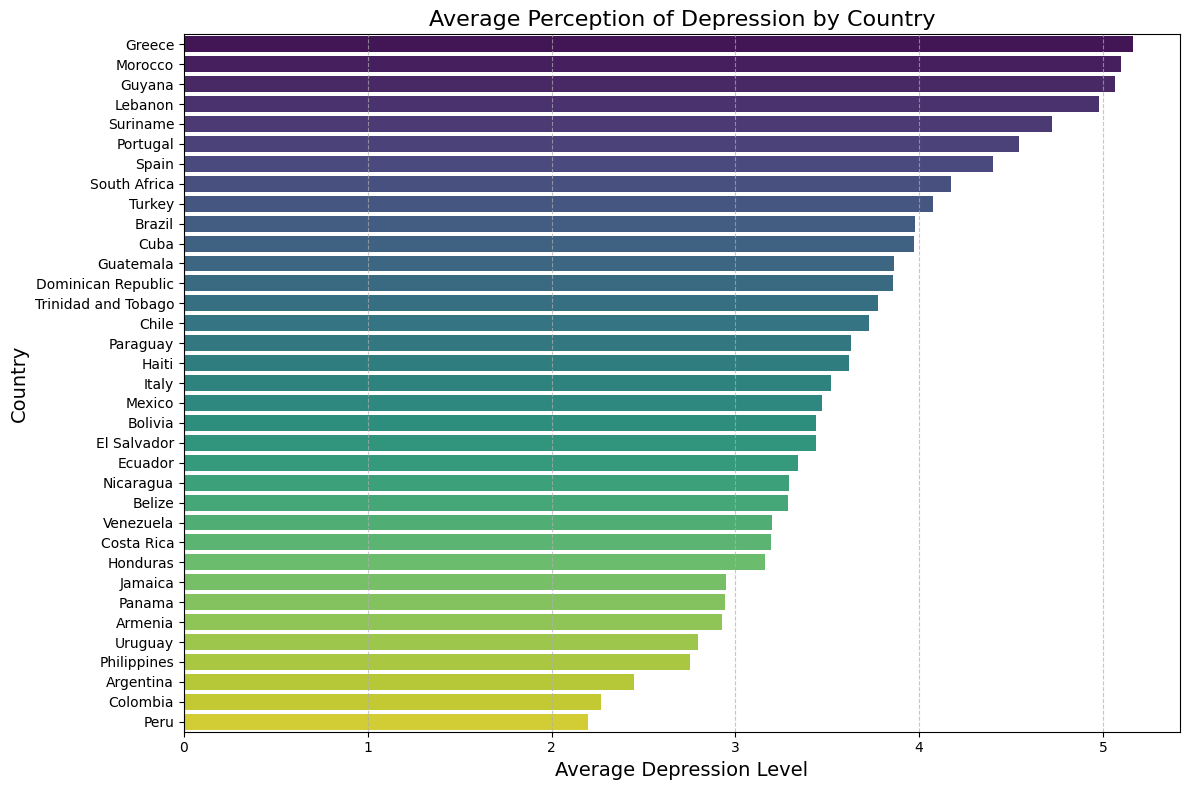

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='Depression', y='Country', data=average_depression_by_country, palette="viridis")

# Customize the plot
plt.title('Average Perception of Depression by Country', fontsize=16)
plt.xlabel('Average Depression Level', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [66]:
dt_1.columns

Index(['Country', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Code', 'Depression', 'Anxiety', 'Bipolar Disorder', 'Eating Disorder',
       'Depression_Binned'],
      dtype='object')

In [67]:
# Calculate the correlation between Life Ladder and Depression
correlation = dt_1['Life Ladder'].corr(dt_1['Depression'])
print(f"Correlation between Life Ladder and Depression: {correlation}")


Correlation between Life Ladder and Depression: -0.29319081236401523


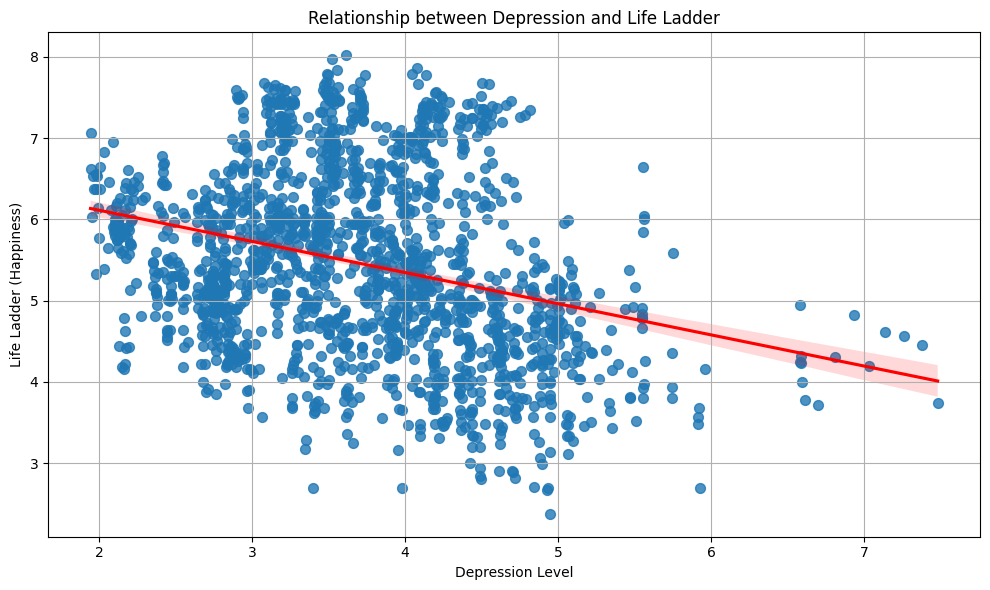

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='Depression', y='Life Ladder', data=dt_1, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Customize the plot
plt.title('Relationship between Depression and Life Ladder')
plt.xlabel('Depression Level')
plt.ylabel('Life Ladder (Happiness)')
plt.grid(True)

plt.tight_layout()
plt.show()


# For latin american countries

In [69]:
# Filter the dataset to include only the selected countries
filtered_data = dt_1[dt_1['Country'].isin(latin_american_countries)]

# Calculate the correlation between Life Ladder and Depression for the filtered data
correlation = filtered_data['Life Ladder'].corr(filtered_data['Depression'])
print(f"Correlation between Life Ladder and Depression for selected countries: {correlation}")


Correlation between Life Ladder and Depression for selected countries: -0.20293306912121395


In [70]:
# Filter the dataset to include only the selected countries
filtered_data = dt_1[dt_1['Country'].isin(latin_american_countries)]

# Calculate the correlation between Life Ladder and Depression for each country
country_wise_correlation = filtered_data.groupby('Country').apply(
    lambda x: x['Life Ladder'].corr(x['Depression'])
).reset_index()

# Rename columns for clarity
country_wise_correlation.columns = ['Country', 'Correlation (Life Ladder vs. Depression)']

# Display the results
print(country_wise_correlation)


                Country  Correlation (Life Ladder vs. Depression)
0             Argentina                                 -0.254618
1               Armenia                                  0.426462
2                Belize                                  1.000000
3               Bolivia                                 -0.519854
4                Brazil                                  0.023878
5                 Chile                                 -0.631792
6              Colombia                                 -0.565526
7            Costa Rica                                 -0.309567
8                  Cuba                                       NaN
9    Dominican Republic                                 -0.377429
10              Ecuador                                 -0.820551
11          El Salvador                                 -0.375091
12               Greece                                  0.614268
13            Guatemala                                 -0.280959
14        

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning:

invalid value encountered in multiply

<ipython-input-70-349896e39ee4>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



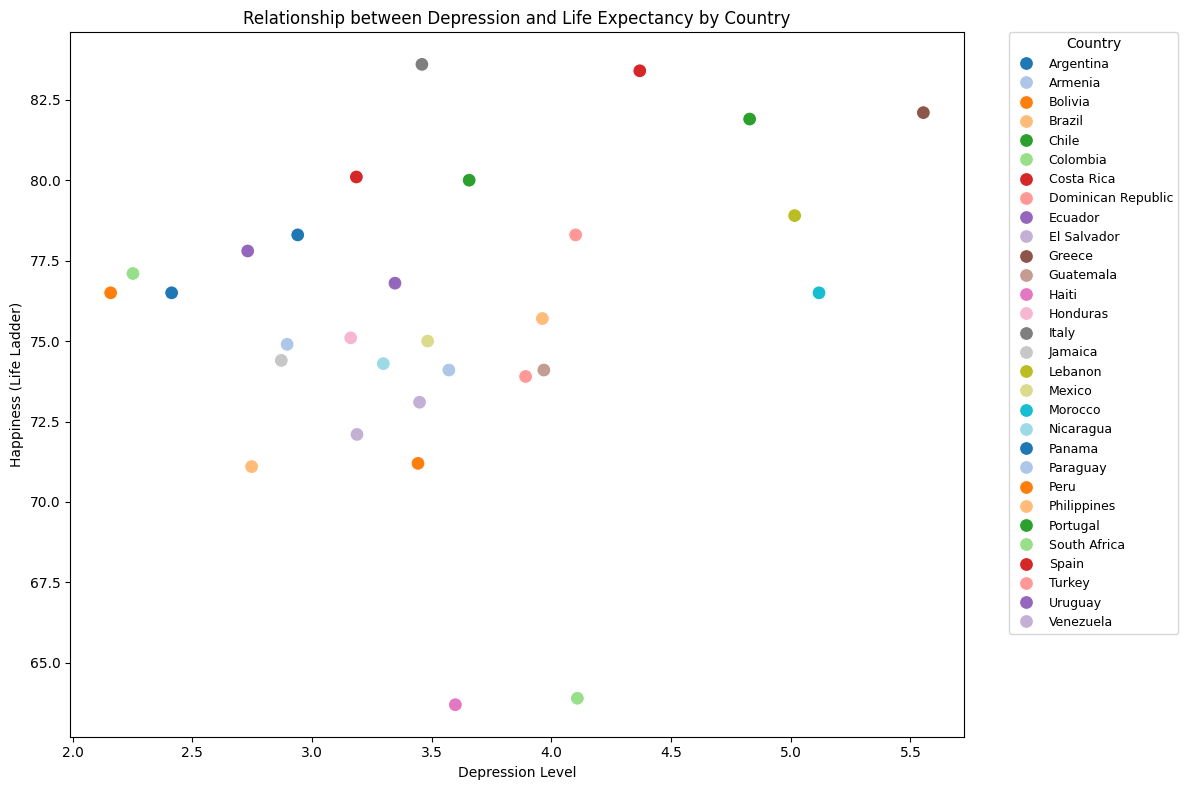

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to include only the selected countries
filtered_data = dx[dx['Country'].isin(latin_american_countries)]

# Set up the plot size
plt.figure(figsize=(12, 8))

# Scatter plot for Depression vs. Happiness (Life Ladder) by Country
sns.scatterplot(x='Depression', y='Life expectancy', data=filtered_data, hue='Country', s=100, palette="tab20")

# Customize the plot
plt.title('Relationship between Depression and Life Expectancy by Country')
plt.xlabel('Depression Level')
plt.ylabel('Happiness (Life Ladder)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=9)

# Display the plot
plt.tight_layout()
plt.show()


Fertility with GDP and Life expectancy

In [72]:
dx.head()

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Happiness_2,Perception of Corruption,Explained by: Social support,Code,Year,Depression,Anxiety,Bipolar Disorder,Eating Disorder
0,Argentina,2.3,ARG,19971.0,76.5,79.7,31.7,0.88,0.98,9.1,92.1,5.929,0.834,0.980,ARG,2010,2.413849,4.889307,1.039087,0.315531
1,Armenia,1.8,ARM,11845.0,74.9,27.7,35.1,0.17,0.95,5.7,63.3,5.283,0.629,0.758,ARM,2010,2.896215,3.150081,0.541941,0.113889
2,Bolivia,2.7,BOL,8525.0,71.2,50.0,24.3,1.65,0.98,12.9,70.1,5.716,0.839,0.782,BOL,2010,3.443046,5.653197,0.887360,0.213614
3,Brazil,1.7,BRA,17106.0,75.7,82.4,32.6,0.87,0.97,6.1,87.1,6.330,0.756,0.944,BRA,2010,3.962524,8.496533,1.112197,0.220067
4,Chile,1.6,CHL,27150.0,80.0,66.4,34.4,0.90,0.97,9.7,87.7,6.172,0.830,0.946,CHL,2010,3.656720,5.582964,0.995287,0.327942


# Total fertility rate (TFR) of a population is the average number of children that would be born to a woman over her lifetime if:

She was to experience the exact current age-specific fertility rates (ASFRs) through her lifetime, and
She was to survive from childbirth until the end of her reproductive life.

Overview of fertility distribution

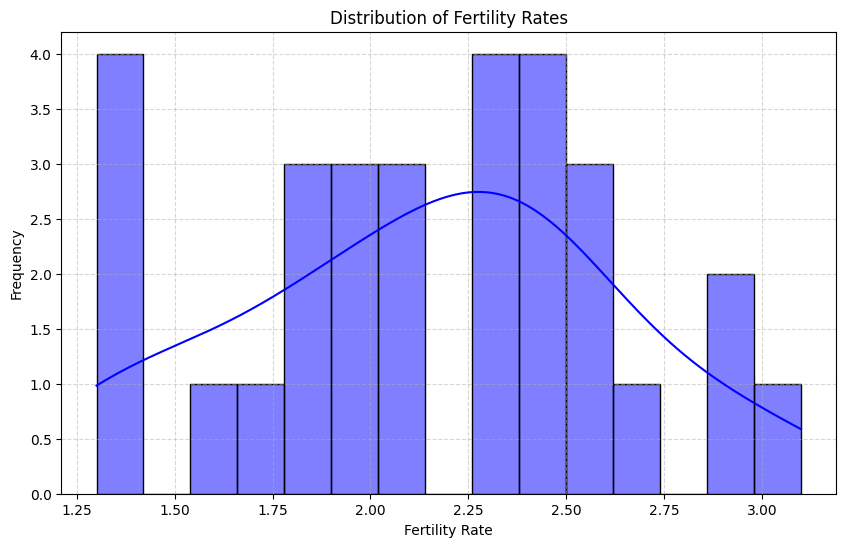

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot of Fertility Rates
plt.figure(figsize=(10, 6))
sns.histplot(dx['Fertility'], bins=15, kde=True, color='blue')
plt.title('Distribution of Fertility Rates')
plt.xlabel('Fertility Rate')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Fertility with economic growth

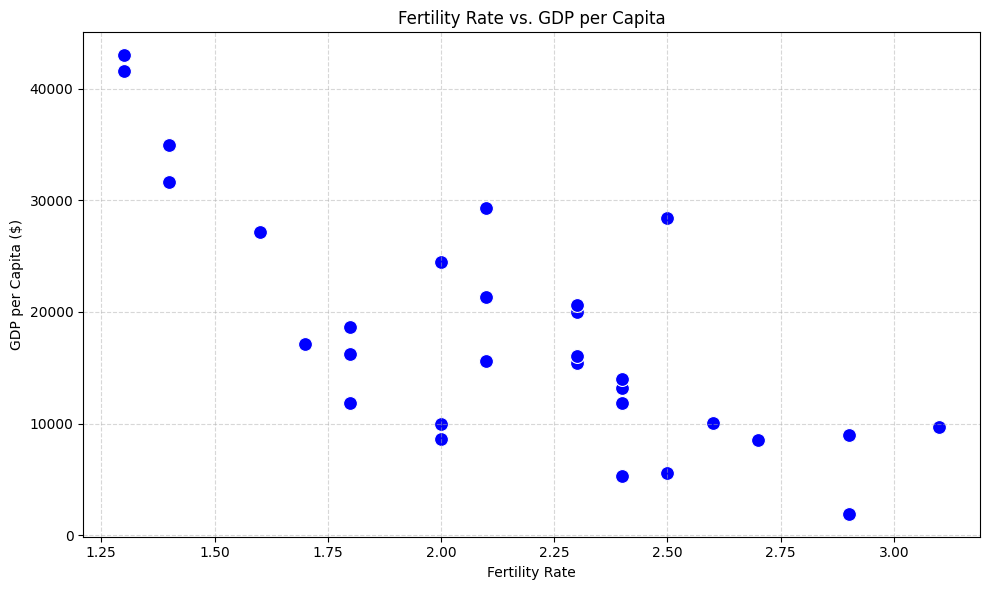

In [75]:
# Scatter plot: Fertility Rate vs. GDP per Capita (without country differentiation)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fertility', y='GDP per capita', data=dx, s=100, color='blue')
plt.title('Fertility Rate vs. GDP per Capita')
plt.xlabel('Fertility Rate')
plt.ylabel('GDP per Capita ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Negative Relationship: There appears to be a general negative trend between fertility rate and GDP per capita. As the fertility rate increases, GDP per capita tends to decrease. This observation aligns with economic theories that suggest lower fertility rates are often associated with higher levels of economic development.